In [165]:
# Imports
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate

## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from xgboost import XGBClassifier
from xgboost import plot_importance

## Evaluation
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [36]:
### FUNCTIONS ###

## Pickle model probabilities
def saveProba(clf, X, name):
    yproba = clf.predict_proba(X)
    path = "dump/proba/" + name
    print("Saved proba to:", path)
    with open(path, "wb") as f:
        pkl.dump(yproba[:,0], f)

## Saves predicted labels to csv file
def saveResult(y_pred, name):
    results_dict = {
        "id": np.arange(1, y_pred.size + 1),
        "prediction": y_pred
    }
    results = pd.DataFrame(results_dict)
    path = "dump/submissions/" + name
    print("Saved submission file to:", path)
    results.to_csv(path, index=False)

In [3]:
# Import data
TRAIN_RPATH = "dump/data/train_vld1.pkl"
with open(TRAIN_RPATH, "rb") as f:
    X_train, X_vld, y_train, y_vld = pkl.load(f)
    
TEST_RPATH = "dump/data/test1.pkl"
with open(TEST_RPATH, "rb") as f:
    X_test = pkl.load(f)

In [5]:
# Model: Extra Trees
# sklearn trees perform feature selection

params = {
    'n_estimators': 150,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'auto',
    'max_depth': 56,
    'bootstrap': True
}

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(**params, random_state=0)
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=56, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [148]:
# Evaluate performance on train and validation set
# ROC curve, confusion matrix... (class imbalance)
forest_pred_train = forest.predict(X_train)
forest_pred_vld = forest.predict(X_vld)

print(classification_report(y_train, forest_pred_train))
print(confusion_matrix(y_train, forest_pred_train))

print(classification_report(y_vld, forest_pred_vld))
print(confusion_matrix(y_vld, forest_pred_vld))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12717
           1       0.76      0.61      0.68      4257

    accuracy                           0.85     16974
   macro avg       0.82      0.77      0.79     16974
weighted avg       0.85      0.85      0.85     16974

[[11890   827]
 [ 1665  2592]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4291
           1       0.71      0.55      0.62      1368

    accuracy                           0.84      5659
   macro avg       0.79      0.74      0.76      5659
weighted avg       0.83      0.84      0.83      5659

[[3978  313]
 [ 613  755]]


In [150]:
## Save model prediction probabilities
saveProba(forest, X_vld, "et_vld.pkl")
saveProba(forest, X_train, "et_train.pkl")

Saved proba to: dump/proba/et_vld.pkl
Saved proba to: dump/proba/et_train.pkl


In [10]:
# # Test set predictions
y_pred_test = forest.predict(X_test)
savePredictions(y_pred_test, "data1_et.csv")

Saved to: dump/submissions/p1_et.csv


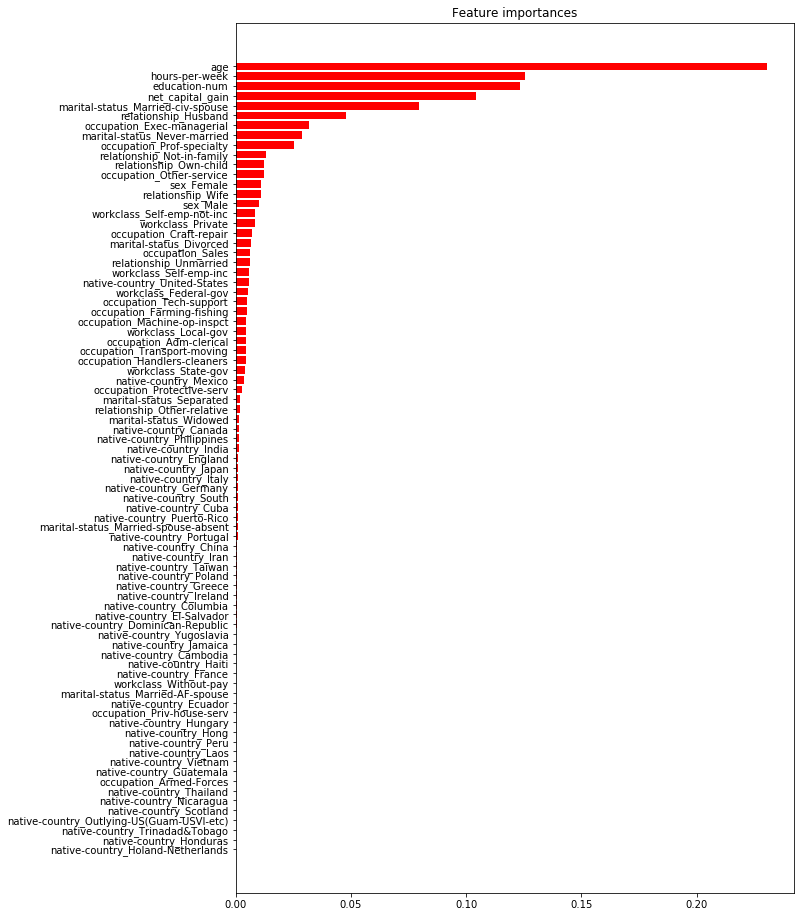

In [75]:
# ExtraTrees feature selection
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

# for i in indices[:10]:
#     print("{}: {:.5f}".format(colnames[i], importances[i]))
    
# Plot the feature importances of the forest
fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
# plt.xlim([-1, X.shape[1]])
plt.show()

In [11]:
# Model: XGBoost
params1 = {
    'booster': 'gbtree',
    'max_depth': 5,
    'learning_rate': 0.01,
    'objective': 'binary:logistic',
    'reg_alpha': 0.1,
    'reg_lambda': 100,
    'n_estimators': 10000
}
watchlist = [(X_vld, y_vld)]

xgb = XGBClassifier(**params1)
xgb.fit(X_train, y_train, eval_set=watchlist)

[0]	validation_0-error:0.14967
[1]	validation_0-error:0.14967
[2]	validation_0-error:0.14967
[3]	validation_0-error:0.14967
[4]	validation_0-error:0.15003
[5]	validation_0-error:0.15003
[6]	validation_0-error:0.15197
[7]	validation_0-error:0.15197
[8]	validation_0-error:0.15197
[9]	validation_0-error:0.15197
[10]	validation_0-error:0.15197
[11]	validation_0-error:0.15197
[12]	validation_0-error:0.15197
[13]	validation_0-error:0.15197
[14]	validation_0-error:0.15197
[15]	validation_0-error:0.14932
[16]	validation_0-error:0.15197
[17]	validation_0-error:0.15038
[18]	validation_0-error:0.15038
[19]	validation_0-error:0.15038
[20]	validation_0-error:0.15038
[21]	validation_0-error:0.15038
[22]	validation_0-error:0.15038
[23]	validation_0-error:0.15038
[24]	validation_0-error:0.15038
[25]	validation_0-error:0.15020
[26]	validation_0-error:0.15020
[27]	validation_0-error:0.15020
[28]	validation_0-error:0.15020
[29]	validation_0-error:0.15003
[30]	validation_0-error:0.15003
[31]	validation_0-

[252]	validation_0-error:0.14419
[253]	validation_0-error:0.14349
[254]	validation_0-error:0.14419
[255]	validation_0-error:0.14331
[256]	validation_0-error:0.14331
[257]	validation_0-error:0.14314
[258]	validation_0-error:0.14366
[259]	validation_0-error:0.14366
[260]	validation_0-error:0.14349
[261]	validation_0-error:0.14349
[262]	validation_0-error:0.14349
[263]	validation_0-error:0.14349
[264]	validation_0-error:0.14349
[265]	validation_0-error:0.14366
[266]	validation_0-error:0.14366
[267]	validation_0-error:0.14366
[268]	validation_0-error:0.14366
[269]	validation_0-error:0.14366
[270]	validation_0-error:0.14366
[271]	validation_0-error:0.14314
[272]	validation_0-error:0.14314
[273]	validation_0-error:0.14314
[274]	validation_0-error:0.14314
[275]	validation_0-error:0.14314
[276]	validation_0-error:0.14314
[277]	validation_0-error:0.14314
[278]	validation_0-error:0.14366
[279]	validation_0-error:0.14384
[280]	validation_0-error:0.14331
[281]	validation_0-error:0.14331
[282]	vali

[501]	validation_0-error:0.13942
[502]	validation_0-error:0.13889
[503]	validation_0-error:0.13907
[504]	validation_0-error:0.13942
[505]	validation_0-error:0.13942
[506]	validation_0-error:0.13978
[507]	validation_0-error:0.13942
[508]	validation_0-error:0.13942
[509]	validation_0-error:0.13925
[510]	validation_0-error:0.13960
[511]	validation_0-error:0.13925
[512]	validation_0-error:0.13925
[513]	validation_0-error:0.13960
[514]	validation_0-error:0.13942
[515]	validation_0-error:0.13907
[516]	validation_0-error:0.13889
[517]	validation_0-error:0.13889
[518]	validation_0-error:0.13907
[519]	validation_0-error:0.13925
[520]	validation_0-error:0.13907
[521]	validation_0-error:0.13907
[522]	validation_0-error:0.13907
[523]	validation_0-error:0.13907
[524]	validation_0-error:0.13889
[525]	validation_0-error:0.13889
[526]	validation_0-error:0.13889
[527]	validation_0-error:0.13889
[528]	validation_0-error:0.13872
[529]	validation_0-error:0.13889
[530]	validation_0-error:0.13872
[531]	vali

[750]	validation_0-error:0.13624
[751]	validation_0-error:0.13624
[752]	validation_0-error:0.13624
[753]	validation_0-error:0.13624
[754]	validation_0-error:0.13660
[755]	validation_0-error:0.13660
[756]	validation_0-error:0.13660
[757]	validation_0-error:0.13660
[758]	validation_0-error:0.13677
[759]	validation_0-error:0.13660
[760]	validation_0-error:0.13677
[761]	validation_0-error:0.13677
[762]	validation_0-error:0.13677
[763]	validation_0-error:0.13677
[764]	validation_0-error:0.13677
[765]	validation_0-error:0.13660
[766]	validation_0-error:0.13713
[767]	validation_0-error:0.13713
[768]	validation_0-error:0.13713
[769]	validation_0-error:0.13713
[770]	validation_0-error:0.13713
[771]	validation_0-error:0.13713
[772]	validation_0-error:0.13713
[773]	validation_0-error:0.13713
[774]	validation_0-error:0.13713
[775]	validation_0-error:0.13713
[776]	validation_0-error:0.13713
[777]	validation_0-error:0.13695
[778]	validation_0-error:0.13695
[779]	validation_0-error:0.13695
[780]	vali

[999]	validation_0-error:0.13501
[1000]	validation_0-error:0.13518
[1001]	validation_0-error:0.13501
[1002]	validation_0-error:0.13501
[1003]	validation_0-error:0.13501
[1004]	validation_0-error:0.13501
[1005]	validation_0-error:0.13483
[1006]	validation_0-error:0.13465
[1007]	validation_0-error:0.13483
[1008]	validation_0-error:0.13483
[1009]	validation_0-error:0.13518
[1010]	validation_0-error:0.13518
[1011]	validation_0-error:0.13518
[1012]	validation_0-error:0.13518
[1013]	validation_0-error:0.13518
[1014]	validation_0-error:0.13501
[1015]	validation_0-error:0.13518
[1016]	validation_0-error:0.13518
[1017]	validation_0-error:0.13518
[1018]	validation_0-error:0.13501
[1019]	validation_0-error:0.13501
[1020]	validation_0-error:0.13483
[1021]	validation_0-error:0.13501
[1022]	validation_0-error:0.13483
[1023]	validation_0-error:0.13483
[1024]	validation_0-error:0.13465
[1025]	validation_0-error:0.13430
[1026]	validation_0-error:0.13430
[1027]	validation_0-error:0.13448
[1028]	validati

[1240]	validation_0-error:0.13395
[1241]	validation_0-error:0.13395
[1242]	validation_0-error:0.13395
[1243]	validation_0-error:0.13395
[1244]	validation_0-error:0.13377
[1245]	validation_0-error:0.13377
[1246]	validation_0-error:0.13377
[1247]	validation_0-error:0.13377
[1248]	validation_0-error:0.13395
[1249]	validation_0-error:0.13395
[1250]	validation_0-error:0.13395
[1251]	validation_0-error:0.13395
[1252]	validation_0-error:0.13395
[1253]	validation_0-error:0.13377
[1254]	validation_0-error:0.13377
[1255]	validation_0-error:0.13377
[1256]	validation_0-error:0.13377
[1257]	validation_0-error:0.13377
[1258]	validation_0-error:0.13359
[1259]	validation_0-error:0.13359
[1260]	validation_0-error:0.13359
[1261]	validation_0-error:0.13359
[1262]	validation_0-error:0.13377
[1263]	validation_0-error:0.13359
[1264]	validation_0-error:0.13359
[1265]	validation_0-error:0.13359
[1266]	validation_0-error:0.13377
[1267]	validation_0-error:0.13377
[1268]	validation_0-error:0.13377
[1269]	validat

[1481]	validation_0-error:0.13236
[1482]	validation_0-error:0.13218
[1483]	validation_0-error:0.13218
[1484]	validation_0-error:0.13218
[1485]	validation_0-error:0.13218
[1486]	validation_0-error:0.13218
[1487]	validation_0-error:0.13218
[1488]	validation_0-error:0.13218
[1489]	validation_0-error:0.13218
[1490]	validation_0-error:0.13236
[1491]	validation_0-error:0.13218
[1492]	validation_0-error:0.13236
[1493]	validation_0-error:0.13236
[1494]	validation_0-error:0.13236
[1495]	validation_0-error:0.13253
[1496]	validation_0-error:0.13253
[1497]	validation_0-error:0.13253
[1498]	validation_0-error:0.13253
[1499]	validation_0-error:0.13253
[1500]	validation_0-error:0.13253
[1501]	validation_0-error:0.13253
[1502]	validation_0-error:0.13253
[1503]	validation_0-error:0.13253
[1504]	validation_0-error:0.13253
[1505]	validation_0-error:0.13253
[1506]	validation_0-error:0.13253
[1507]	validation_0-error:0.13253
[1508]	validation_0-error:0.13253
[1509]	validation_0-error:0.13253
[1510]	validat

[1722]	validation_0-error:0.13182
[1723]	validation_0-error:0.13182
[1724]	validation_0-error:0.13182
[1725]	validation_0-error:0.13182
[1726]	validation_0-error:0.13182
[1727]	validation_0-error:0.13182
[1728]	validation_0-error:0.13182
[1729]	validation_0-error:0.13200
[1730]	validation_0-error:0.13182
[1731]	validation_0-error:0.13200
[1732]	validation_0-error:0.13182
[1733]	validation_0-error:0.13182
[1734]	validation_0-error:0.13182
[1735]	validation_0-error:0.13182
[1736]	validation_0-error:0.13182
[1737]	validation_0-error:0.13200
[1738]	validation_0-error:0.13182
[1739]	validation_0-error:0.13182
[1740]	validation_0-error:0.13182
[1741]	validation_0-error:0.13182
[1742]	validation_0-error:0.13200
[1743]	validation_0-error:0.13200
[1744]	validation_0-error:0.13200
[1745]	validation_0-error:0.13200
[1746]	validation_0-error:0.13200
[1747]	validation_0-error:0.13200
[1748]	validation_0-error:0.13200
[1749]	validation_0-error:0.13200
[1750]	validation_0-error:0.13165
[1751]	validat

[1963]	validation_0-error:0.13236
[1964]	validation_0-error:0.13236
[1965]	validation_0-error:0.13218
[1966]	validation_0-error:0.13218
[1967]	validation_0-error:0.13218
[1968]	validation_0-error:0.13218
[1969]	validation_0-error:0.13218
[1970]	validation_0-error:0.13218
[1971]	validation_0-error:0.13218
[1972]	validation_0-error:0.13218
[1973]	validation_0-error:0.13218
[1974]	validation_0-error:0.13218
[1975]	validation_0-error:0.13218
[1976]	validation_0-error:0.13218
[1977]	validation_0-error:0.13218
[1978]	validation_0-error:0.13218
[1979]	validation_0-error:0.13218
[1980]	validation_0-error:0.13218
[1981]	validation_0-error:0.13218
[1982]	validation_0-error:0.13218
[1983]	validation_0-error:0.13218
[1984]	validation_0-error:0.13200
[1985]	validation_0-error:0.13218
[1986]	validation_0-error:0.13200
[1987]	validation_0-error:0.13200
[1988]	validation_0-error:0.13200
[1989]	validation_0-error:0.13200
[1990]	validation_0-error:0.13200
[1991]	validation_0-error:0.13200
[1992]	validat

[2204]	validation_0-error:0.13147
[2205]	validation_0-error:0.13147
[2206]	validation_0-error:0.13147
[2207]	validation_0-error:0.13147
[2208]	validation_0-error:0.13147
[2209]	validation_0-error:0.13147
[2210]	validation_0-error:0.13147
[2211]	validation_0-error:0.13147
[2212]	validation_0-error:0.13147
[2213]	validation_0-error:0.13147
[2214]	validation_0-error:0.13147
[2215]	validation_0-error:0.13147
[2216]	validation_0-error:0.13147
[2217]	validation_0-error:0.13147
[2218]	validation_0-error:0.13147
[2219]	validation_0-error:0.13147
[2220]	validation_0-error:0.13147
[2221]	validation_0-error:0.13147
[2222]	validation_0-error:0.13147
[2223]	validation_0-error:0.13147
[2224]	validation_0-error:0.13147
[2225]	validation_0-error:0.13147
[2226]	validation_0-error:0.13147
[2227]	validation_0-error:0.13147
[2228]	validation_0-error:0.13147
[2229]	validation_0-error:0.13147
[2230]	validation_0-error:0.13147
[2231]	validation_0-error:0.13129
[2232]	validation_0-error:0.13112
[2233]	validat

[2445]	validation_0-error:0.13129
[2446]	validation_0-error:0.13147
[2447]	validation_0-error:0.13147
[2448]	validation_0-error:0.13147
[2449]	validation_0-error:0.13147
[2450]	validation_0-error:0.13147
[2451]	validation_0-error:0.13147
[2452]	validation_0-error:0.13147
[2453]	validation_0-error:0.13147
[2454]	validation_0-error:0.13147
[2455]	validation_0-error:0.13147
[2456]	validation_0-error:0.13147
[2457]	validation_0-error:0.13147
[2458]	validation_0-error:0.13147
[2459]	validation_0-error:0.13147
[2460]	validation_0-error:0.13147
[2461]	validation_0-error:0.13147
[2462]	validation_0-error:0.13147
[2463]	validation_0-error:0.13147
[2464]	validation_0-error:0.13129
[2465]	validation_0-error:0.13112
[2466]	validation_0-error:0.13129
[2467]	validation_0-error:0.13112
[2468]	validation_0-error:0.13112
[2469]	validation_0-error:0.13112
[2470]	validation_0-error:0.13112
[2471]	validation_0-error:0.13112
[2472]	validation_0-error:0.13112
[2473]	validation_0-error:0.13112
[2474]	validat

[2686]	validation_0-error:0.13112
[2687]	validation_0-error:0.13112
[2688]	validation_0-error:0.13112
[2689]	validation_0-error:0.13129
[2690]	validation_0-error:0.13129
[2691]	validation_0-error:0.13129
[2692]	validation_0-error:0.13112
[2693]	validation_0-error:0.13112
[2694]	validation_0-error:0.13112
[2695]	validation_0-error:0.13112
[2696]	validation_0-error:0.13112
[2697]	validation_0-error:0.13112
[2698]	validation_0-error:0.13112
[2699]	validation_0-error:0.13112
[2700]	validation_0-error:0.13112
[2701]	validation_0-error:0.13112
[2702]	validation_0-error:0.13112
[2703]	validation_0-error:0.13129
[2704]	validation_0-error:0.13112
[2705]	validation_0-error:0.13112
[2706]	validation_0-error:0.13112
[2707]	validation_0-error:0.13094
[2708]	validation_0-error:0.13112
[2709]	validation_0-error:0.13112
[2710]	validation_0-error:0.13112
[2711]	validation_0-error:0.13112
[2712]	validation_0-error:0.13112
[2713]	validation_0-error:0.13112
[2714]	validation_0-error:0.13094
[2715]	validat

[2927]	validation_0-error:0.13023
[2928]	validation_0-error:0.13023
[2929]	validation_0-error:0.13023
[2930]	validation_0-error:0.13023
[2931]	validation_0-error:0.13023
[2932]	validation_0-error:0.13023
[2933]	validation_0-error:0.13023
[2934]	validation_0-error:0.13023
[2935]	validation_0-error:0.13023
[2936]	validation_0-error:0.13023
[2937]	validation_0-error:0.13023
[2938]	validation_0-error:0.13023
[2939]	validation_0-error:0.13023
[2940]	validation_0-error:0.13023
[2941]	validation_0-error:0.13023
[2942]	validation_0-error:0.13023
[2943]	validation_0-error:0.13023
[2944]	validation_0-error:0.13023
[2945]	validation_0-error:0.13023
[2946]	validation_0-error:0.13023
[2947]	validation_0-error:0.13023
[2948]	validation_0-error:0.13023
[2949]	validation_0-error:0.13023
[2950]	validation_0-error:0.13023
[2951]	validation_0-error:0.13023
[2952]	validation_0-error:0.13023
[2953]	validation_0-error:0.13023
[2954]	validation_0-error:0.13023
[2955]	validation_0-error:0.13023
[2956]	validat

[3168]	validation_0-error:0.13023
[3169]	validation_0-error:0.13023
[3170]	validation_0-error:0.13023
[3171]	validation_0-error:0.13023
[3172]	validation_0-error:0.13023
[3173]	validation_0-error:0.13023
[3174]	validation_0-error:0.13023
[3175]	validation_0-error:0.13023
[3176]	validation_0-error:0.13023
[3177]	validation_0-error:0.13023
[3178]	validation_0-error:0.13041
[3179]	validation_0-error:0.13041
[3180]	validation_0-error:0.13041
[3181]	validation_0-error:0.13023
[3182]	validation_0-error:0.13023
[3183]	validation_0-error:0.13023
[3184]	validation_0-error:0.13023
[3185]	validation_0-error:0.13023
[3186]	validation_0-error:0.13023
[3187]	validation_0-error:0.13023
[3188]	validation_0-error:0.13041
[3189]	validation_0-error:0.13023
[3190]	validation_0-error:0.13023
[3191]	validation_0-error:0.13023
[3192]	validation_0-error:0.13041
[3193]	validation_0-error:0.13023
[3194]	validation_0-error:0.13023
[3195]	validation_0-error:0.13023
[3196]	validation_0-error:0.13023
[3197]	validat

[3409]	validation_0-error:0.13076
[3410]	validation_0-error:0.13076
[3411]	validation_0-error:0.13076
[3412]	validation_0-error:0.13094
[3413]	validation_0-error:0.13094
[3414]	validation_0-error:0.13094
[3415]	validation_0-error:0.13094
[3416]	validation_0-error:0.13094
[3417]	validation_0-error:0.13094
[3418]	validation_0-error:0.13094
[3419]	validation_0-error:0.13094
[3420]	validation_0-error:0.13094
[3421]	validation_0-error:0.13094
[3422]	validation_0-error:0.13094
[3423]	validation_0-error:0.13094
[3424]	validation_0-error:0.13094
[3425]	validation_0-error:0.13094
[3426]	validation_0-error:0.13094
[3427]	validation_0-error:0.13094
[3428]	validation_0-error:0.13094
[3429]	validation_0-error:0.13094
[3430]	validation_0-error:0.13112
[3431]	validation_0-error:0.13112
[3432]	validation_0-error:0.13112
[3433]	validation_0-error:0.13112
[3434]	validation_0-error:0.13112
[3435]	validation_0-error:0.13112
[3436]	validation_0-error:0.13112
[3437]	validation_0-error:0.13112
[3438]	validat

[3650]	validation_0-error:0.13094
[3651]	validation_0-error:0.13094
[3652]	validation_0-error:0.13094
[3653]	validation_0-error:0.13094
[3654]	validation_0-error:0.13094
[3655]	validation_0-error:0.13094
[3656]	validation_0-error:0.13094
[3657]	validation_0-error:0.13094
[3658]	validation_0-error:0.13094
[3659]	validation_0-error:0.13094
[3660]	validation_0-error:0.13094
[3661]	validation_0-error:0.13094
[3662]	validation_0-error:0.13094
[3663]	validation_0-error:0.13094
[3664]	validation_0-error:0.13094
[3665]	validation_0-error:0.13094
[3666]	validation_0-error:0.13094
[3667]	validation_0-error:0.13094
[3668]	validation_0-error:0.13076
[3669]	validation_0-error:0.13076
[3670]	validation_0-error:0.13076
[3671]	validation_0-error:0.13076
[3672]	validation_0-error:0.13076
[3673]	validation_0-error:0.13076
[3674]	validation_0-error:0.13076
[3675]	validation_0-error:0.13094
[3676]	validation_0-error:0.13076
[3677]	validation_0-error:0.13076
[3678]	validation_0-error:0.13076
[3679]	validat

[3891]	validation_0-error:0.13059
[3892]	validation_0-error:0.13059
[3893]	validation_0-error:0.13059
[3894]	validation_0-error:0.13059
[3895]	validation_0-error:0.13059
[3896]	validation_0-error:0.13059
[3897]	validation_0-error:0.13059
[3898]	validation_0-error:0.13059
[3899]	validation_0-error:0.13059
[3900]	validation_0-error:0.13059
[3901]	validation_0-error:0.13059
[3902]	validation_0-error:0.13059
[3903]	validation_0-error:0.13059
[3904]	validation_0-error:0.13059
[3905]	validation_0-error:0.13059
[3906]	validation_0-error:0.13059
[3907]	validation_0-error:0.13059
[3908]	validation_0-error:0.13059
[3909]	validation_0-error:0.13059
[3910]	validation_0-error:0.13059
[3911]	validation_0-error:0.13059
[3912]	validation_0-error:0.13059
[3913]	validation_0-error:0.13059
[3914]	validation_0-error:0.13059
[3915]	validation_0-error:0.13059
[3916]	validation_0-error:0.13059
[3917]	validation_0-error:0.13059
[3918]	validation_0-error:0.13059
[3919]	validation_0-error:0.13059
[3920]	validat

[4132]	validation_0-error:0.13094
[4133]	validation_0-error:0.13094
[4134]	validation_0-error:0.13094
[4135]	validation_0-error:0.13094
[4136]	validation_0-error:0.13094
[4137]	validation_0-error:0.13094
[4138]	validation_0-error:0.13094
[4139]	validation_0-error:0.13094
[4140]	validation_0-error:0.13094
[4141]	validation_0-error:0.13094
[4142]	validation_0-error:0.13094
[4143]	validation_0-error:0.13094
[4144]	validation_0-error:0.13094
[4145]	validation_0-error:0.13094
[4146]	validation_0-error:0.13094
[4147]	validation_0-error:0.13094
[4148]	validation_0-error:0.13094
[4149]	validation_0-error:0.13094
[4150]	validation_0-error:0.13094
[4151]	validation_0-error:0.13094
[4152]	validation_0-error:0.13094
[4153]	validation_0-error:0.13094
[4154]	validation_0-error:0.13094
[4155]	validation_0-error:0.13094
[4156]	validation_0-error:0.13112
[4157]	validation_0-error:0.13112
[4158]	validation_0-error:0.13112
[4159]	validation_0-error:0.13112
[4160]	validation_0-error:0.13112
[4161]	validat

[4373]	validation_0-error:0.13006
[4374]	validation_0-error:0.13006
[4375]	validation_0-error:0.13006
[4376]	validation_0-error:0.13006
[4377]	validation_0-error:0.13006
[4378]	validation_0-error:0.13006
[4379]	validation_0-error:0.13006
[4380]	validation_0-error:0.13006
[4381]	validation_0-error:0.13006
[4382]	validation_0-error:0.13006
[4383]	validation_0-error:0.13006
[4384]	validation_0-error:0.13006
[4385]	validation_0-error:0.13006
[4386]	validation_0-error:0.13006
[4387]	validation_0-error:0.13006
[4388]	validation_0-error:0.13006
[4389]	validation_0-error:0.13006
[4390]	validation_0-error:0.13006
[4391]	validation_0-error:0.13006
[4392]	validation_0-error:0.13006
[4393]	validation_0-error:0.13006
[4394]	validation_0-error:0.13006
[4395]	validation_0-error:0.13006
[4396]	validation_0-error:0.13006
[4397]	validation_0-error:0.13006
[4398]	validation_0-error:0.13006
[4399]	validation_0-error:0.13006
[4400]	validation_0-error:0.13006
[4401]	validation_0-error:0.13006
[4402]	validat

[4614]	validation_0-error:0.13006
[4615]	validation_0-error:0.13006
[4616]	validation_0-error:0.13006
[4617]	validation_0-error:0.13006
[4618]	validation_0-error:0.13006
[4619]	validation_0-error:0.13006
[4620]	validation_0-error:0.13006
[4621]	validation_0-error:0.13006
[4622]	validation_0-error:0.13006
[4623]	validation_0-error:0.13006
[4624]	validation_0-error:0.13006
[4625]	validation_0-error:0.13006
[4626]	validation_0-error:0.13006
[4627]	validation_0-error:0.13006
[4628]	validation_0-error:0.13006
[4629]	validation_0-error:0.13006
[4630]	validation_0-error:0.13006
[4631]	validation_0-error:0.13006
[4632]	validation_0-error:0.13006
[4633]	validation_0-error:0.13006
[4634]	validation_0-error:0.13006
[4635]	validation_0-error:0.13006
[4636]	validation_0-error:0.13006
[4637]	validation_0-error:0.13006
[4638]	validation_0-error:0.13006
[4639]	validation_0-error:0.13006
[4640]	validation_0-error:0.13006
[4641]	validation_0-error:0.13006
[4642]	validation_0-error:0.13006
[4643]	validat

[4855]	validation_0-error:0.12988
[4856]	validation_0-error:0.12988
[4857]	validation_0-error:0.12988
[4858]	validation_0-error:0.12988
[4859]	validation_0-error:0.12988
[4860]	validation_0-error:0.12988
[4861]	validation_0-error:0.12988
[4862]	validation_0-error:0.12988
[4863]	validation_0-error:0.12988
[4864]	validation_0-error:0.12988
[4865]	validation_0-error:0.12988
[4866]	validation_0-error:0.12988
[4867]	validation_0-error:0.12988
[4868]	validation_0-error:0.12988
[4869]	validation_0-error:0.12988
[4870]	validation_0-error:0.12988
[4871]	validation_0-error:0.12988
[4872]	validation_0-error:0.12988
[4873]	validation_0-error:0.12988
[4874]	validation_0-error:0.12988
[4875]	validation_0-error:0.12988
[4876]	validation_0-error:0.12988
[4877]	validation_0-error:0.12988
[4878]	validation_0-error:0.12988
[4879]	validation_0-error:0.12988
[4880]	validation_0-error:0.12988
[4881]	validation_0-error:0.12988
[4882]	validation_0-error:0.12988
[4883]	validation_0-error:0.12988
[4884]	validat

[5096]	validation_0-error:0.12970
[5097]	validation_0-error:0.12988
[5098]	validation_0-error:0.12988
[5099]	validation_0-error:0.12988
[5100]	validation_0-error:0.12988
[5101]	validation_0-error:0.12988
[5102]	validation_0-error:0.12988
[5103]	validation_0-error:0.12988
[5104]	validation_0-error:0.13006
[5105]	validation_0-error:0.13006
[5106]	validation_0-error:0.13006
[5107]	validation_0-error:0.13006
[5108]	validation_0-error:0.13006
[5109]	validation_0-error:0.13006
[5110]	validation_0-error:0.13006
[5111]	validation_0-error:0.13006
[5112]	validation_0-error:0.13006
[5113]	validation_0-error:0.13006
[5114]	validation_0-error:0.13006
[5115]	validation_0-error:0.13006
[5116]	validation_0-error:0.13006
[5117]	validation_0-error:0.13006
[5118]	validation_0-error:0.13006
[5119]	validation_0-error:0.13006
[5120]	validation_0-error:0.13006
[5121]	validation_0-error:0.13006
[5122]	validation_0-error:0.13006
[5123]	validation_0-error:0.13006
[5124]	validation_0-error:0.13006
[5125]	validat

[5337]	validation_0-error:0.13059
[5338]	validation_0-error:0.13059
[5339]	validation_0-error:0.13076
[5340]	validation_0-error:0.13076
[5341]	validation_0-error:0.13076
[5342]	validation_0-error:0.13076
[5343]	validation_0-error:0.13076
[5344]	validation_0-error:0.13076
[5345]	validation_0-error:0.13076
[5346]	validation_0-error:0.13076
[5347]	validation_0-error:0.13076
[5348]	validation_0-error:0.13076
[5349]	validation_0-error:0.13076
[5350]	validation_0-error:0.13076
[5351]	validation_0-error:0.13076
[5352]	validation_0-error:0.13076
[5353]	validation_0-error:0.13076
[5354]	validation_0-error:0.13076
[5355]	validation_0-error:0.13076
[5356]	validation_0-error:0.13076
[5357]	validation_0-error:0.13076
[5358]	validation_0-error:0.13076
[5359]	validation_0-error:0.13076
[5360]	validation_0-error:0.13059
[5361]	validation_0-error:0.13076
[5362]	validation_0-error:0.13059
[5363]	validation_0-error:0.13059
[5364]	validation_0-error:0.13059
[5365]	validation_0-error:0.13076
[5366]	validat

[5578]	validation_0-error:0.13059
[5579]	validation_0-error:0.13059
[5580]	validation_0-error:0.13059
[5581]	validation_0-error:0.13059
[5582]	validation_0-error:0.13059
[5583]	validation_0-error:0.13059
[5584]	validation_0-error:0.13059
[5585]	validation_0-error:0.13059
[5586]	validation_0-error:0.13059
[5587]	validation_0-error:0.13059
[5588]	validation_0-error:0.13059
[5589]	validation_0-error:0.13059
[5590]	validation_0-error:0.13059
[5591]	validation_0-error:0.13059
[5592]	validation_0-error:0.13059
[5593]	validation_0-error:0.13059
[5594]	validation_0-error:0.13059
[5595]	validation_0-error:0.13094
[5596]	validation_0-error:0.13094
[5597]	validation_0-error:0.13094
[5598]	validation_0-error:0.13094
[5599]	validation_0-error:0.13076
[5600]	validation_0-error:0.13076
[5601]	validation_0-error:0.13094
[5602]	validation_0-error:0.13094
[5603]	validation_0-error:0.13076
[5604]	validation_0-error:0.13076
[5605]	validation_0-error:0.13076
[5606]	validation_0-error:0.13076
[5607]	validat

[5819]	validation_0-error:0.13076
[5820]	validation_0-error:0.13076
[5821]	validation_0-error:0.13076
[5822]	validation_0-error:0.13076
[5823]	validation_0-error:0.13076
[5824]	validation_0-error:0.13076
[5825]	validation_0-error:0.13076
[5826]	validation_0-error:0.13076
[5827]	validation_0-error:0.13076
[5828]	validation_0-error:0.13076
[5829]	validation_0-error:0.13076
[5830]	validation_0-error:0.13076
[5831]	validation_0-error:0.13076
[5832]	validation_0-error:0.13076
[5833]	validation_0-error:0.13076
[5834]	validation_0-error:0.13076
[5835]	validation_0-error:0.13076
[5836]	validation_0-error:0.13076
[5837]	validation_0-error:0.13076
[5838]	validation_0-error:0.13076
[5839]	validation_0-error:0.13076
[5840]	validation_0-error:0.13076
[5841]	validation_0-error:0.13076
[5842]	validation_0-error:0.13076
[5843]	validation_0-error:0.13076
[5844]	validation_0-error:0.13076
[5845]	validation_0-error:0.13076
[5846]	validation_0-error:0.13076
[5847]	validation_0-error:0.13076
[5848]	validat

[6060]	validation_0-error:0.13041
[6061]	validation_0-error:0.13041
[6062]	validation_0-error:0.13041
[6063]	validation_0-error:0.13041
[6064]	validation_0-error:0.13041
[6065]	validation_0-error:0.13041
[6066]	validation_0-error:0.13041
[6067]	validation_0-error:0.13041
[6068]	validation_0-error:0.13041
[6069]	validation_0-error:0.13041
[6070]	validation_0-error:0.13041
[6071]	validation_0-error:0.13041
[6072]	validation_0-error:0.13041
[6073]	validation_0-error:0.13041
[6074]	validation_0-error:0.13041
[6075]	validation_0-error:0.13041
[6076]	validation_0-error:0.13041
[6077]	validation_0-error:0.13041
[6078]	validation_0-error:0.13041
[6079]	validation_0-error:0.13041
[6080]	validation_0-error:0.13041
[6081]	validation_0-error:0.13041
[6082]	validation_0-error:0.13041
[6083]	validation_0-error:0.13041
[6084]	validation_0-error:0.13041
[6085]	validation_0-error:0.13041
[6086]	validation_0-error:0.13041
[6087]	validation_0-error:0.13041
[6088]	validation_0-error:0.13041
[6089]	validat

[6301]	validation_0-error:0.13059
[6302]	validation_0-error:0.13059
[6303]	validation_0-error:0.13059
[6304]	validation_0-error:0.13059
[6305]	validation_0-error:0.13059
[6306]	validation_0-error:0.13059
[6307]	validation_0-error:0.13059
[6308]	validation_0-error:0.13059
[6309]	validation_0-error:0.13059
[6310]	validation_0-error:0.13059
[6311]	validation_0-error:0.13059
[6312]	validation_0-error:0.13059
[6313]	validation_0-error:0.13059
[6314]	validation_0-error:0.13059
[6315]	validation_0-error:0.13059
[6316]	validation_0-error:0.13059
[6317]	validation_0-error:0.13076
[6318]	validation_0-error:0.13076
[6319]	validation_0-error:0.13076
[6320]	validation_0-error:0.13076
[6321]	validation_0-error:0.13076
[6322]	validation_0-error:0.13076
[6323]	validation_0-error:0.13076
[6324]	validation_0-error:0.13076
[6325]	validation_0-error:0.13076
[6326]	validation_0-error:0.13076
[6327]	validation_0-error:0.13076
[6328]	validation_0-error:0.13076
[6329]	validation_0-error:0.13059
[6330]	validat

[6542]	validation_0-error:0.13094
[6543]	validation_0-error:0.13094
[6544]	validation_0-error:0.13094
[6545]	validation_0-error:0.13112
[6546]	validation_0-error:0.13094
[6547]	validation_0-error:0.13112
[6548]	validation_0-error:0.13112
[6549]	validation_0-error:0.13112
[6550]	validation_0-error:0.13112
[6551]	validation_0-error:0.13094
[6552]	validation_0-error:0.13112
[6553]	validation_0-error:0.13112
[6554]	validation_0-error:0.13112
[6555]	validation_0-error:0.13112
[6556]	validation_0-error:0.13112
[6557]	validation_0-error:0.13094
[6558]	validation_0-error:0.13094
[6559]	validation_0-error:0.13094
[6560]	validation_0-error:0.13094
[6561]	validation_0-error:0.13094
[6562]	validation_0-error:0.13094
[6563]	validation_0-error:0.13094
[6564]	validation_0-error:0.13094
[6565]	validation_0-error:0.13094
[6566]	validation_0-error:0.13094
[6567]	validation_0-error:0.13094
[6568]	validation_0-error:0.13094
[6569]	validation_0-error:0.13094
[6570]	validation_0-error:0.13094
[6571]	validat

[6783]	validation_0-error:0.13129
[6784]	validation_0-error:0.13129
[6785]	validation_0-error:0.13129
[6786]	validation_0-error:0.13129
[6787]	validation_0-error:0.13129
[6788]	validation_0-error:0.13129
[6789]	validation_0-error:0.13129
[6790]	validation_0-error:0.13129
[6791]	validation_0-error:0.13129
[6792]	validation_0-error:0.13129
[6793]	validation_0-error:0.13129
[6794]	validation_0-error:0.13129
[6795]	validation_0-error:0.13129
[6796]	validation_0-error:0.13129
[6797]	validation_0-error:0.13129
[6798]	validation_0-error:0.13129
[6799]	validation_0-error:0.13129
[6800]	validation_0-error:0.13129
[6801]	validation_0-error:0.13147
[6802]	validation_0-error:0.13147
[6803]	validation_0-error:0.13147
[6804]	validation_0-error:0.13147
[6805]	validation_0-error:0.13147
[6806]	validation_0-error:0.13147
[6807]	validation_0-error:0.13147
[6808]	validation_0-error:0.13147
[6809]	validation_0-error:0.13112
[6810]	validation_0-error:0.13112
[6811]	validation_0-error:0.13112
[6812]	validat

[7024]	validation_0-error:0.13059
[7025]	validation_0-error:0.13059
[7026]	validation_0-error:0.13059
[7027]	validation_0-error:0.13059
[7028]	validation_0-error:0.13059
[7029]	validation_0-error:0.13059
[7030]	validation_0-error:0.13059
[7031]	validation_0-error:0.13059
[7032]	validation_0-error:0.13059
[7033]	validation_0-error:0.13059
[7034]	validation_0-error:0.13059
[7035]	validation_0-error:0.13059
[7036]	validation_0-error:0.13059
[7037]	validation_0-error:0.13059
[7038]	validation_0-error:0.13059
[7039]	validation_0-error:0.13059
[7040]	validation_0-error:0.13059
[7041]	validation_0-error:0.13059
[7042]	validation_0-error:0.13059
[7043]	validation_0-error:0.13059
[7044]	validation_0-error:0.13059
[7045]	validation_0-error:0.13059
[7046]	validation_0-error:0.13059
[7047]	validation_0-error:0.13059
[7048]	validation_0-error:0.13076
[7049]	validation_0-error:0.13076
[7050]	validation_0-error:0.13076
[7051]	validation_0-error:0.13059
[7052]	validation_0-error:0.13076
[7053]	validat

[7265]	validation_0-error:0.13112
[7266]	validation_0-error:0.13112
[7267]	validation_0-error:0.13112
[7268]	validation_0-error:0.13112
[7269]	validation_0-error:0.13112
[7270]	validation_0-error:0.13112
[7271]	validation_0-error:0.13112
[7272]	validation_0-error:0.13112
[7273]	validation_0-error:0.13112
[7274]	validation_0-error:0.13112
[7275]	validation_0-error:0.13112
[7276]	validation_0-error:0.13112
[7277]	validation_0-error:0.13112
[7278]	validation_0-error:0.13112
[7279]	validation_0-error:0.13112
[7280]	validation_0-error:0.13112
[7281]	validation_0-error:0.13112
[7282]	validation_0-error:0.13112
[7283]	validation_0-error:0.13112
[7284]	validation_0-error:0.13112
[7285]	validation_0-error:0.13112
[7286]	validation_0-error:0.13112
[7287]	validation_0-error:0.13112
[7288]	validation_0-error:0.13112
[7289]	validation_0-error:0.13112
[7290]	validation_0-error:0.13112
[7291]	validation_0-error:0.13112
[7292]	validation_0-error:0.13112
[7293]	validation_0-error:0.13112
[7294]	validat

[7506]	validation_0-error:0.13059
[7507]	validation_0-error:0.13041
[7508]	validation_0-error:0.13041
[7509]	validation_0-error:0.13041
[7510]	validation_0-error:0.13041
[7511]	validation_0-error:0.13041
[7512]	validation_0-error:0.13041
[7513]	validation_0-error:0.13059
[7514]	validation_0-error:0.13059
[7515]	validation_0-error:0.13059
[7516]	validation_0-error:0.13059
[7517]	validation_0-error:0.13059
[7518]	validation_0-error:0.13059
[7519]	validation_0-error:0.13059
[7520]	validation_0-error:0.13059
[7521]	validation_0-error:0.13059
[7522]	validation_0-error:0.13059
[7523]	validation_0-error:0.13059
[7524]	validation_0-error:0.13059
[7525]	validation_0-error:0.13059
[7526]	validation_0-error:0.13059
[7527]	validation_0-error:0.13059
[7528]	validation_0-error:0.13059
[7529]	validation_0-error:0.13059
[7530]	validation_0-error:0.13059
[7531]	validation_0-error:0.13059
[7532]	validation_0-error:0.13059
[7533]	validation_0-error:0.13059
[7534]	validation_0-error:0.13059
[7535]	validat

[7747]	validation_0-error:0.13112
[7748]	validation_0-error:0.13112
[7749]	validation_0-error:0.13112
[7750]	validation_0-error:0.13112
[7751]	validation_0-error:0.13112
[7752]	validation_0-error:0.13112
[7753]	validation_0-error:0.13112
[7754]	validation_0-error:0.13112
[7755]	validation_0-error:0.13112
[7756]	validation_0-error:0.13112
[7757]	validation_0-error:0.13112
[7758]	validation_0-error:0.13112
[7759]	validation_0-error:0.13129
[7760]	validation_0-error:0.13129
[7761]	validation_0-error:0.13129
[7762]	validation_0-error:0.13112
[7763]	validation_0-error:0.13112
[7764]	validation_0-error:0.13112
[7765]	validation_0-error:0.13129
[7766]	validation_0-error:0.13129
[7767]	validation_0-error:0.13129
[7768]	validation_0-error:0.13129
[7769]	validation_0-error:0.13129
[7770]	validation_0-error:0.13129
[7771]	validation_0-error:0.13129
[7772]	validation_0-error:0.13129
[7773]	validation_0-error:0.13129
[7774]	validation_0-error:0.13129
[7775]	validation_0-error:0.13129
[7776]	validat

[7988]	validation_0-error:0.13147
[7989]	validation_0-error:0.13147
[7990]	validation_0-error:0.13147
[7991]	validation_0-error:0.13147
[7992]	validation_0-error:0.13147
[7993]	validation_0-error:0.13147
[7994]	validation_0-error:0.13147
[7995]	validation_0-error:0.13147
[7996]	validation_0-error:0.13147
[7997]	validation_0-error:0.13147
[7998]	validation_0-error:0.13147
[7999]	validation_0-error:0.13147
[8000]	validation_0-error:0.13147
[8001]	validation_0-error:0.13147
[8002]	validation_0-error:0.13147
[8003]	validation_0-error:0.13147
[8004]	validation_0-error:0.13147
[8005]	validation_0-error:0.13147
[8006]	validation_0-error:0.13147
[8007]	validation_0-error:0.13147
[8008]	validation_0-error:0.13147
[8009]	validation_0-error:0.13147
[8010]	validation_0-error:0.13147
[8011]	validation_0-error:0.13147
[8012]	validation_0-error:0.13147
[8013]	validation_0-error:0.13147
[8014]	validation_0-error:0.13147
[8015]	validation_0-error:0.13147
[8016]	validation_0-error:0.13147
[8017]	validat

[8229]	validation_0-error:0.13094
[8230]	validation_0-error:0.13094
[8231]	validation_0-error:0.13094
[8232]	validation_0-error:0.13094
[8233]	validation_0-error:0.13094
[8234]	validation_0-error:0.13094
[8235]	validation_0-error:0.13094
[8236]	validation_0-error:0.13094
[8237]	validation_0-error:0.13094
[8238]	validation_0-error:0.13094
[8239]	validation_0-error:0.13094
[8240]	validation_0-error:0.13094
[8241]	validation_0-error:0.13076
[8242]	validation_0-error:0.13094
[8243]	validation_0-error:0.13094
[8244]	validation_0-error:0.13094
[8245]	validation_0-error:0.13094
[8246]	validation_0-error:0.13094
[8247]	validation_0-error:0.13094
[8248]	validation_0-error:0.13094
[8249]	validation_0-error:0.13076
[8250]	validation_0-error:0.13076
[8251]	validation_0-error:0.13076
[8252]	validation_0-error:0.13076
[8253]	validation_0-error:0.13076
[8254]	validation_0-error:0.13076
[8255]	validation_0-error:0.13076
[8256]	validation_0-error:0.13076
[8257]	validation_0-error:0.13076
[8258]	validat

[8470]	validation_0-error:0.13076
[8471]	validation_0-error:0.13076
[8472]	validation_0-error:0.13076
[8473]	validation_0-error:0.13076
[8474]	validation_0-error:0.13076
[8475]	validation_0-error:0.13076
[8476]	validation_0-error:0.13076
[8477]	validation_0-error:0.13076
[8478]	validation_0-error:0.13076
[8479]	validation_0-error:0.13076
[8480]	validation_0-error:0.13076
[8481]	validation_0-error:0.13076
[8482]	validation_0-error:0.13076
[8483]	validation_0-error:0.13076
[8484]	validation_0-error:0.13076
[8485]	validation_0-error:0.13076
[8486]	validation_0-error:0.13076
[8487]	validation_0-error:0.13076
[8488]	validation_0-error:0.13076
[8489]	validation_0-error:0.13076
[8490]	validation_0-error:0.13076
[8491]	validation_0-error:0.13076
[8492]	validation_0-error:0.13076
[8493]	validation_0-error:0.13076
[8494]	validation_0-error:0.13076
[8495]	validation_0-error:0.13076
[8496]	validation_0-error:0.13076
[8497]	validation_0-error:0.13076
[8498]	validation_0-error:0.13076
[8499]	validat

[8711]	validation_0-error:0.13094
[8712]	validation_0-error:0.13094
[8713]	validation_0-error:0.13094
[8714]	validation_0-error:0.13094
[8715]	validation_0-error:0.13094
[8716]	validation_0-error:0.13094
[8717]	validation_0-error:0.13094
[8718]	validation_0-error:0.13094
[8719]	validation_0-error:0.13094
[8720]	validation_0-error:0.13094
[8721]	validation_0-error:0.13094
[8722]	validation_0-error:0.13094
[8723]	validation_0-error:0.13094
[8724]	validation_0-error:0.13094
[8725]	validation_0-error:0.13094
[8726]	validation_0-error:0.13094
[8727]	validation_0-error:0.13094
[8728]	validation_0-error:0.13094
[8729]	validation_0-error:0.13094
[8730]	validation_0-error:0.13094
[8731]	validation_0-error:0.13094
[8732]	validation_0-error:0.13076
[8733]	validation_0-error:0.13059
[8734]	validation_0-error:0.13076
[8735]	validation_0-error:0.13076
[8736]	validation_0-error:0.13076
[8737]	validation_0-error:0.13076
[8738]	validation_0-error:0.13076
[8739]	validation_0-error:0.13076
[8740]	validat

[8952]	validation_0-error:0.13059
[8953]	validation_0-error:0.13059
[8954]	validation_0-error:0.13059
[8955]	validation_0-error:0.13059
[8956]	validation_0-error:0.13059
[8957]	validation_0-error:0.13059
[8958]	validation_0-error:0.13059
[8959]	validation_0-error:0.13059
[8960]	validation_0-error:0.13059
[8961]	validation_0-error:0.13059
[8962]	validation_0-error:0.13059
[8963]	validation_0-error:0.13059
[8964]	validation_0-error:0.13059
[8965]	validation_0-error:0.13059
[8966]	validation_0-error:0.13059
[8967]	validation_0-error:0.13059
[8968]	validation_0-error:0.13059
[8969]	validation_0-error:0.13059
[8970]	validation_0-error:0.13059
[8971]	validation_0-error:0.13059
[8972]	validation_0-error:0.13059
[8973]	validation_0-error:0.13059
[8974]	validation_0-error:0.13059
[8975]	validation_0-error:0.13059
[8976]	validation_0-error:0.13059
[8977]	validation_0-error:0.13059
[8978]	validation_0-error:0.13059
[8979]	validation_0-error:0.13059
[8980]	validation_0-error:0.13059
[8981]	validat

[9193]	validation_0-error:0.13041
[9194]	validation_0-error:0.13041
[9195]	validation_0-error:0.13041
[9196]	validation_0-error:0.13041
[9197]	validation_0-error:0.13041
[9198]	validation_0-error:0.13041
[9199]	validation_0-error:0.13041
[9200]	validation_0-error:0.13041
[9201]	validation_0-error:0.13041
[9202]	validation_0-error:0.13041
[9203]	validation_0-error:0.13041
[9204]	validation_0-error:0.13041
[9205]	validation_0-error:0.13041
[9206]	validation_0-error:0.13041
[9207]	validation_0-error:0.13041
[9208]	validation_0-error:0.13041
[9209]	validation_0-error:0.13041
[9210]	validation_0-error:0.13041
[9211]	validation_0-error:0.13041
[9212]	validation_0-error:0.13041
[9213]	validation_0-error:0.13041
[9214]	validation_0-error:0.13041
[9215]	validation_0-error:0.13041
[9216]	validation_0-error:0.13041
[9217]	validation_0-error:0.13041
[9218]	validation_0-error:0.13041
[9219]	validation_0-error:0.13041
[9220]	validation_0-error:0.13041
[9221]	validation_0-error:0.13041
[9222]	validat

[9434]	validation_0-error:0.13076
[9435]	validation_0-error:0.13076
[9436]	validation_0-error:0.13076
[9437]	validation_0-error:0.13076
[9438]	validation_0-error:0.13076
[9439]	validation_0-error:0.13076
[9440]	validation_0-error:0.13076
[9441]	validation_0-error:0.13076
[9442]	validation_0-error:0.13076
[9443]	validation_0-error:0.13076
[9444]	validation_0-error:0.13076
[9445]	validation_0-error:0.13076
[9446]	validation_0-error:0.13076
[9447]	validation_0-error:0.13076
[9448]	validation_0-error:0.13076
[9449]	validation_0-error:0.13076
[9450]	validation_0-error:0.13076
[9451]	validation_0-error:0.13076
[9452]	validation_0-error:0.13076
[9453]	validation_0-error:0.13076
[9454]	validation_0-error:0.13076
[9455]	validation_0-error:0.13076
[9456]	validation_0-error:0.13076
[9457]	validation_0-error:0.13076
[9458]	validation_0-error:0.13076
[9459]	validation_0-error:0.13076
[9460]	validation_0-error:0.13076
[9461]	validation_0-error:0.13076
[9462]	validation_0-error:0.13076
[9463]	validat

[9675]	validation_0-error:0.13076
[9676]	validation_0-error:0.13076
[9677]	validation_0-error:0.13076
[9678]	validation_0-error:0.13076
[9679]	validation_0-error:0.13076
[9680]	validation_0-error:0.13076
[9681]	validation_0-error:0.13076
[9682]	validation_0-error:0.13076
[9683]	validation_0-error:0.13076
[9684]	validation_0-error:0.13076
[9685]	validation_0-error:0.13076
[9686]	validation_0-error:0.13076
[9687]	validation_0-error:0.13076
[9688]	validation_0-error:0.13076
[9689]	validation_0-error:0.13076
[9690]	validation_0-error:0.13076
[9691]	validation_0-error:0.13076
[9692]	validation_0-error:0.13076
[9693]	validation_0-error:0.13076
[9694]	validation_0-error:0.13076
[9695]	validation_0-error:0.13076
[9696]	validation_0-error:0.13076
[9697]	validation_0-error:0.13076
[9698]	validation_0-error:0.13076
[9699]	validation_0-error:0.13076
[9700]	validation_0-error:0.13076
[9701]	validation_0-error:0.13076
[9702]	validation_0-error:0.13076
[9703]	validation_0-error:0.13076
[9704]	validat

[9916]	validation_0-error:0.13076
[9917]	validation_0-error:0.13076
[9918]	validation_0-error:0.13076
[9919]	validation_0-error:0.13076
[9920]	validation_0-error:0.13076
[9921]	validation_0-error:0.13076
[9922]	validation_0-error:0.13076
[9923]	validation_0-error:0.13076
[9924]	validation_0-error:0.13076
[9925]	validation_0-error:0.13076
[9926]	validation_0-error:0.13076
[9927]	validation_0-error:0.13076
[9928]	validation_0-error:0.13076
[9929]	validation_0-error:0.13076
[9930]	validation_0-error:0.13076
[9931]	validation_0-error:0.13076
[9932]	validation_0-error:0.13076
[9933]	validation_0-error:0.13094
[9934]	validation_0-error:0.13076
[9935]	validation_0-error:0.13076
[9936]	validation_0-error:0.13076
[9937]	validation_0-error:0.13076
[9938]	validation_0-error:0.13094
[9939]	validation_0-error:0.13094
[9940]	validation_0-error:0.13094
[9941]	validation_0-error:0.13094
[9942]	validation_0-error:0.13094
[9943]	validation_0-error:0.13094
[9944]	validation_0-error:0.13094
[9945]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.1,
              reg_lambda=100, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [33]:
# Make predictions
y_pred_train1 = xgb.predict(X_train)
y_pred_vld1 = xgb.predict(X_vld)

print("Train set:")
print(classification_report(y_train, y_pred_train1))
print(confusion_matrix(y_train, y_pred_train1))

print("\nValidation set:")
print(classification_report(y_vld, y_pred_vld1))
print(confusion_matrix(y_vld, y_pred_vld1))

Train set:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12717
           1       0.80      0.69      0.74      4257

    accuracy                           0.88     16974
   macro avg       0.85      0.82      0.83     16974
weighted avg       0.88      0.88      0.88     16974

[[11992   725]
 [ 1309  2948]]

Validation set:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4291
           1       0.77      0.65      0.71      1368

    accuracy                           0.87      5659
   macro avg       0.83      0.80      0.81      5659
weighted avg       0.86      0.87      0.87      5659

[[4025  266]
 [ 475  893]]


In [50]:
## Save model prediction probabilities
saveProba(xgb, X_train, "xgb_train.pkl")
saveProba(xgb, X_vld, "xgb_vld.pkl")

# # Test set predictions
# xgb_pred_test = xgb.predict(X_test)
# savePredictions(xgb_pred_test, "data1_xgb.csv")

(24421, 2)


[0.01681748 0.06100175 0.03774114 0.01892258 0.02220177 0.00643219
 0.00274175 0.00196497 0.01407976 0.00581373 0.         0.0049012
 0.         0.39328274 0.00180776 0.01831609 0.00185288 0.00207871
 0.00517142 0.         0.00352283 0.1251579  0.01753997 0.00739098
 0.00165562 0.01870866 0.00096598 0.02236735 0.01451548 0.00717651
 0.04112683 0.00933993 0.01054093 0.02018385 0.00459325 0.00594893
 0.00742153 0.01659946 0.00943748 0.         0.         0.00173324
 0.00374545 0.00238219 0.         0.00076556 0.         0.00122451
 0.00113881 0.         0.00063922 0.         0.00140682 0.00245474
 0.         0.         0.         0.         0.         0.
 0.         0.00165127 0.         0.00125489 0.         0.00991711
 0.         0.         0.00173531 0.         0.         0.00346414
 0.         0.         0.         0.         0.         0.
 0.0047572  0.00161693 0.00079128]


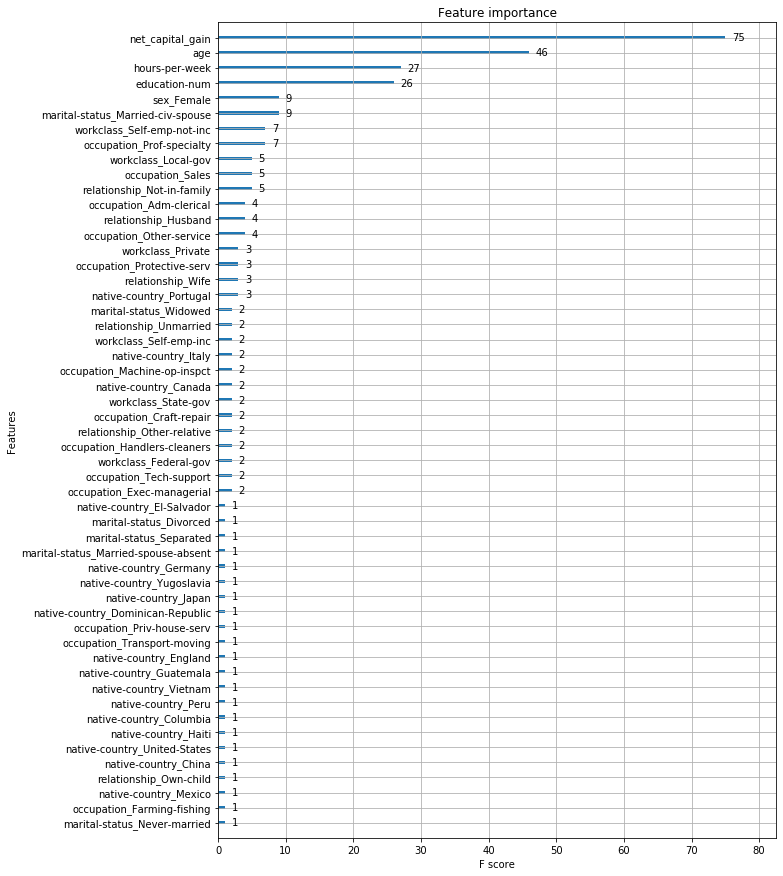

In [120]:
# # Feature importance
# print(xgb.feature_importances_)

# Built in function that uses F-scores to rank
fig, ax = plt.subplots(1, 1, figsize=(10,15))
plot_importance(xgb, ax=ax)
plt.show()

In [146]:
## KNN
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [147]:
# Evaluate performance on train and validation set
# ROC curve, confusion matrix... (class imbalance)
knn_pred_train = knn.predict(X_train)
knn_pred_vld = knn.predict(X_vld)

print(classification_report(y_train, y_pred_train_knn))
print(confusion_matrix(y_train, y_pred_train_knn))

print(classification_report(y_vld, y_pred_vld_knn))
print(confusion_matrix(y_vld, y_pred_vld_knn))

## Save model prediction probabilities
saveProba(xgb, X_train, "xgb_train.pkl")
saveProba(xgb, X_vld, "xgb_vld.pkl")

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     12717
           1       0.80      0.74      0.77      4257

    accuracy                           0.89     16974
   macro avg       0.86      0.84      0.85     16974
weighted avg       0.89      0.89      0.89     16974

[[11932   785]
 [ 1120  3137]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4291
           1       0.68      0.65      0.66      1368

    accuracy                           0.84      5659
   macro avg       0.79      0.78      0.78      5659
weighted avg       0.84      0.84      0.84      5659

[[3878  413]
 [ 482  886]]


In [152]:
## Save model prediction probabilities
saveProba(knn, X_train, "knn_train.pkl")
saveProba(knn, X_vld, "knn_vld.pkl")

# # Test set predictions
# xgb_pred_test = xgb.predict(X_test)
# savePredictions(xgb_pred_test, "data1_xgb.csv")

Saved proba to: dump/proba/knn_train.pkl
Saved proba to: dump/proba/knn_vld.pkl


In [101]:
logi_idx = np.equal(np.array(y_pred_vld_knn), np.array(et_pred_vld))
print(np.sum(logi_idx)/len(logi_idx)) # Percentage similarity predictions

0.14225128114507862


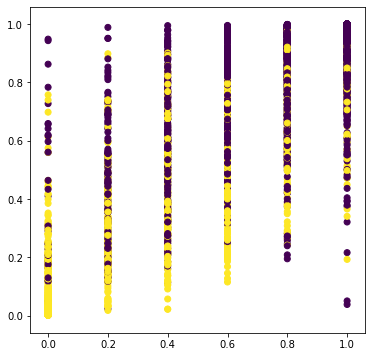

0.9252518112740767


In [102]:
# ## Load model probabilities
# with open("dump/proba/p1_et.pkl", "rb") as f:
#     et_proba_vld = pkl.load(f)

# with open("dump/proba/p1_xgb.pkl", "rb") as f:
#     xgb_proba_vld = pkl.load(f)

with open("dump/proba/p1_knn.pkl", "rb") as f:
    knn_proba_vld = pkl.load(f)

## Investigate correlation of model predictions
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(knn_proba_vld, xgb_proba_vld, c=y_vld) # 0: yellow
plt.show()

## Convert probabilities to labels
xgb_pred_vld = [0 if p <= 0.5 else 1 for p in xgb_proba_vld]
et_pred_vld = [0 if p <= 0.5 else 1 for p in et_proba_vld]

logi_idx = np.equal(np.array(xgb_pred_vld), np.array(et_pred_vld))
print(np.sum(logi_idx)/len(logi_idx)) # Percentage similarity predictions

In [127]:
## Stacking: Majority voting
model_predictions = {
    "ET": et_pred_vld,
    "XGB": xgb_pred_vld,
    "KNN" : y_pred_vld_knn
}
predictions_df = pd.DataFrame(model_predictions)

voting_proba = predictions.mean(axis=1)
voting_pred = [0 if p <= 0.5 else 1 for p in voting_proba]

print(classification_report(y_vld, voting_pred))
print(confusion_matrix(y_vld, voting_pred))

voting_proba_df = pd.concat([predictions_df, voting_proba], axis=1)
print(avg_proba.iloc[1:20,:])

              precision    recall  f1-score   support

           0       0.30      0.08      0.12      4291
           1       0.13      0.45      0.21      1368

    accuracy                           0.17      5659
   macro avg       0.22      0.26      0.16      5659
weighted avg       0.26      0.17      0.14      5659

[[ 328 3963]
 [ 753  615]]
    ET  XGB  KNN         0
1    1    1    0  0.666667
2    0    0    1  0.333333
3    1    1    0  0.666667
4    1    0    0  0.333333
5    1    1    0  0.666667
6    1    1    0  0.666667
7    0    0    1  0.333333
8    1    1    0  0.666667
9    1    1    0  0.666667
10   1    1    0  0.666667
11   1    1    0  0.666667
12   1    1    0  0.666667
13   1    1    0  0.666667
14   0    0    1  0.333333
15   1    1    0  0.666667
16   1    1    0  0.666667
17   1    1    0  0.666667
18   1    1    0  0.666667
19   1    1    0  0.666667


In [161]:
## Stacking: Soft averaging
model_proba = {
    "ET": et_proba_vld,
    "XGB": xgb_proba_vld,
    "KNN" : knn_proba_vld
}
proba_df_vld = pd.DataFrame(model_proba)

avg_proba_vld = proba_df_vld.mean(axis=1)
avg_pred_vld = pd.Series([0 if p <= 0.5 else 1 for p in avg_proba])

print(classification_report(y_vld, avg_pred_vld))
print(confusion_matrix(y_vld, avg_pred_vld))

avg_proba_df = pd.concat([proba_df_vld, avg_proba_vld, avg_pred_vld], axis=1)
print(avg_proba_df.iloc[1:20,:])

              precision    recall  f1-score   support

           0       0.23      0.06      0.10      4291
           1       0.11      0.35      0.16      1368

    accuracy                           0.13      5659
   macro avg       0.17      0.21      0.13      5659
weighted avg       0.20      0.13      0.11      5659

[[ 265 4026]
 [ 886  482]]
          ET       XGB  KNN         0  1
1   0.729519  0.844431  0.8  0.791317  1
2   0.201713  0.118797  0.0  0.106836  0
3   0.964321  0.995205  1.0  0.986509  1
4   0.510816  0.472781  0.6  0.527866  1
5   0.982296  0.996829  1.0  0.993042  1
6   0.986826  0.993241  1.0  0.993355  1
7   0.237310  0.128716  0.2  0.188675  0
8   0.953067  0.912019  0.8  0.888362  1
9   0.732120  0.573693  0.6  0.635271  1
10  0.979065  0.989133  1.0  0.989399  1
11  0.521623  0.785004  1.0  0.768876  1
12  0.904420  0.988995  1.0  0.964472  1
13  0.972584  0.988822  1.0  0.987135  1
14  0.441857  0.007465  0.0  0.149774  0
15  0.691750  0.816730  1.0  0.

In [155]:
ls dump/proba/

et_train.pkl  knn_train.pkl  xgb_train.pkl
et_vld.pkl    knn_vld.pkl    xgb_vld.pkl


In [ ]:
## Stacking: Model prediction probabilities

# with open("dump/proba/et_train.pkl", "rb") as f:
#     et_proba_train = pkl.load(f)

# with open("dump/proba/xgb_train.pkl", "rb") as f:
#     xgb_proba_train = pkl.load(f)

# with open("dump/proba/knn_train.pkl", "rb") as f:
#     knn_proba_train = pkl.load(f)

model_proba_train = {
    "ET": et_proba_train,
    "XGB": xgb_proba_train,
    "KNN" : knn_proba_train
}

proba_df_train = pd.DataFrame(model_proba_train)

# with open("dump/proba/et_vld.pkl", "rb") as f:
#     et_proba_vld = pkl.load(f)

# with open("dump/proba/xgb_vld.pkl", "rb") as f:
#     xgb_proba_vld = pkl.load(f)

# with open("dump/proba/knn_vld.pkl", "rb") as f:
#     knn_proba_vld = pkl.load(f)

model_proba_vld = {
    "ET": et_proba_vld,
    "XGB": xgb_proba_vld,
    "KNN" : knn_proba_vld
}

proba_df_vld = pd.DataFrame(model_proba_vld)

In [162]:
## Stacking: Decision tree
tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)
tree.fit(proba_df_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
## Stacking: Decision tree
# Evaluate performance on vld and validation set
# ROC curve, confusion matrix... (class imbalance)
tree_pred_train = tree.predict(proba_df_train)
tree_pred_vld = tree.predict(proba_df_vld)

print(classification_report(y_train, tree_pred_train))
print(confusion_matrix(y_train, tree_pred_train))

print(classification_report(y_vld, tree_pred_vld))
print(confusion_matrix(y_vld, tree_pred_vld))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     12717
           1       0.80      0.74      0.77      4257

    accuracy                           0.89     16974
   macro avg       0.86      0.84      0.85     16974
weighted avg       0.89      0.89      0.89     16974

[[11932   785]
 [ 1120  3137]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4291
           1       0.68      0.65      0.66      1368

    accuracy                           0.84      5659
   macro avg       0.79      0.78      0.78      5659
weighted avg       0.84      0.84      0.84      5659

[[3878  413]
 [ 482  886]]


In [170]:
## Stacked: MLP
mlp = MLPClassifier(hidden_layer_sizes=(3,5,5,5,3), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, random_state=0,
                    learning_rate_init=0.01)
mlp.fit(proba_df_train, y_train)

Iteration 1, loss = 0.46745831
Iteration 2, loss = 0.31808861
Iteration 3, loss = 0.27843819
Iteration 4, loss = 0.26099776
Iteration 5, loss = 0.24872636
Iteration 6, loss = 0.24257144
Iteration 7, loss = 0.23768028
Iteration 8, loss = 0.23365271
Iteration 9, loss = 0.23675523
Iteration 10, loss = 0.23024300
Iteration 11, loss = 0.22689122
Iteration 12, loss = 0.22635926
Iteration 13, loss = 0.22526589
Iteration 14, loss = 0.22574884
Iteration 15, loss = 0.22372949
Iteration 16, loss = 0.22317104
Iteration 17, loss = 0.22266964
Iteration 18, loss = 0.22083900
Iteration 19, loss = 0.22223246
Iteration 20, loss = 0.22113174
Iteration 21, loss = 0.21990961
Iteration 22, loss = 0.21867005
Iteration 23, loss = 0.21791368
Iteration 24, loss = 0.21817857
Iteration 25, loss = 0.21900352
Iteration 26, loss = 0.21659337
Iteration 27, loss = 0.21590761
Iteration 28, loss = 0.21652977
Iteration 29, loss = 0.21857920
Iteration 30, loss = 0.21545123
Iteration 31, loss = 0.21647542
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 5, 5, 5, 3), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [171]:
## Stacking: Decision mlp
# Evaluate performance on vld and validation set
# ROC curve, confusion matrix... (class imbalance)
mlp_pred_train = mlp.predict(proba_df_train)
mlp_pred_vld = mlp.predict(proba_df_vld)

print(classification_report(y_train, mlp_pred_train))
print(confusion_matrix(y_train, mlp_pred_train))

print(classification_report(y_vld, mlp_pred_vld))
print(confusion_matrix(y_vld, mlp_pred_vld))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12717
           1       0.81      0.76      0.79      4257

    accuracy                           0.90     16974
   macro avg       0.87      0.85      0.86     16974
weighted avg       0.89      0.90      0.89     16974

[[11957   760]
 [ 1011  3246]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4291
           1       0.72      0.66      0.69      1368

    accuracy                           0.86      5659
   macro avg       0.81      0.79      0.80      5659
weighted avg       0.85      0.86      0.85      5659

[[3937  354]
 [ 460  908]]


In [ ]:
# PARAMETERS TO HANDLE CLASS IMBALANCE
# scale_pos_weight parameter? (results in funny prediction probabilities)
# to avoid that set max_delta_step
# GET A ROUGH IDEA OF GOOD PARAMETERS AND THEN SELECT FEATURES AND NORMALISE FEATURES

# OBSERVE FOR OVERFITTING
# HOW TO AVOID OVERFITTING?
# DECREASE MODEL COMPLEXITIYY
# ADD RANDOMNESS
# https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [ ]:
# CLASS IMBALANCE?
# THERE IS A GROUP OF POSITIVE SAMPLES THAT ARE HARD TO DIFFERENTIATE
# PCA LOADINGS? CHECK WHICH FEATURES ARE HEAVILY LOADED?

In [ ]:
## KNN
### Try different preprocessing for KNN
### E.g. Selecting features and PCA

### Stacking
#### Base models
- Different preprocessing steps for different models
- Z-score normalisation for logistic regression and neural networks
- No need for monotonic normalisation functions for tree-based models
- k-NN: Normalisation based on distance measure
- GBMs require parameter tuning! (If learning rate is low it requires more trees)
- Use PCA or t-SNE for preprocessing! -> For k-NN?

#### Evaluation of base models
-  To evaluate correlation between predictions of two models
    1. Hamming distance
    2. Matthew's correlation coefficient

#### Final predictive layer
- Majority voting: Wisdom of crowd
- Logistic regression: Weighing of the models?
- Decision tree:  If this model predicts 1 it is 100% correct else depend on prediction from other model
- Neural network: Learn patterns?

### Questions
- How to use linear regression to blend predictions in a classification task?
- Feature importance sorted by Gini index?
- Evaluation: Use of micro vs macro scores?
- How to deal with class imbalance?

### To-do
1. EDA: PCA and t-SNE

### Thoughts
- Models find it easy to differentiate one subset of negative samples

In [ ]:
# # select features using threshold
# selection = SelectFromModel(model, threshold=thresh, prefit=True)
# select_X_train = selection.transform(X_train)
# # train model
# selection_model = XGBClassifier()
# selection_model.fit(select_X_train, y_train)
# # eval model
# select_X_test = selection.transform(X_test)
# y_pred = selection_model.predict(select_X_test)

In [83]:
# # Model: XGBoost
# # Not sklearn API

# # Convert data
# dmat_train = xgb.DMatrix(X_train, y_train)
# dmat_vld = xgb.DMatrix(X_vld, y_vld)

# # specify parameters via map
# param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
# num_round = 2
# watchlist = [(dmat_train, 'eval'), (dmat_train, 'train')]
# bst = xgb.train(param, dmat_train, num_round, watchlist)

[0]	eval-error:0.17586	train-error:0.17586
[1]	eval-error:0.16390	train-error:0.16390
